<a href="https://colab.research.google.com/github/rislam21/Data-engineering/blob/main/MLP_ClassExercise_12092024__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Exercise 1: Implementing a Single Neuron**

**Objective:** Understand the basic structure of a neuron.


**Task:** Write a Python function that implements a single neuron. The neuron should take an input vector **X**
and a weight vector **W**, apply a linear combination, and then apply a sigmoid activation function.

$z = \sigma\left(\sum_{i=1}^{n} w_i x_i + b\right)$

Hint: Here is the sigmoid ($\sigma$)function formula:

$\sigma(x) = \frac{1}{1 + e^{-x}}$

In [2]:
import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid function.

    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    Returns
    -------
    z : float
      a value between 0 and 1.
    """
    ####### Your Code Here #########
    z = 1 / (1 + np.exp(-x))
    ################################
    return z

def single_neuron(x, w, b):
    """
    Implement the forward pass. Calculate the weighted sum (z = w*x + b)
    Hint: Use np.dot for the weighted sum, then apply sigmoid
    Parameters
    ----------
    x : array_like
        Data point values (input values).
    w : array_like
        Data point values (random weights).
    b : float
        Data point values (bias).
    Returns
    -------
    z : float
      a value between 0 and 1.
    """
    ####### Your Code Here #########
    z = np.dot(w, x) + b
    ################################
    return sigmoid(z)

# Test the function with some inputs
x = np.array([0.0, 0.5, -0.2, 0.1, 0.4, 0.3, -0.88, 0.4, 0.15, 0.69])
w = np.array([0.4, 0.6, -0.8, 0.2, 0.3, 0.4, 0.6, -0.5, -0.6, 0.9])
b = 0.1
output = single_neuron(x, w, b)
print("Output:", output)
print("Expected Output: 0.6509005438802886")

Output: 0.6509005438802886
Expected Output: 0.6509005438802886


**Exercise 2: Implementing a Simple Layer**

**Objective:** Learn to stack neurons into a single layer.

**Task:** Extend the single neuron into a layer of neurons. Implement a function that takes an input vector, a matrix of weights, and a vector of biases, and returns the output of the layer.


In [3]:
def layer(x, W, b):

    """
    Extend the single neuron into a layer of neurons.
    Implement a function that takes an input vector, a matrix of weights, and a vector of biases, and returns the output of the layer.
    ----------
    x : array_like
        Data point values (input values).
    W :  array_like
        multidimensional array of data point values (weights).
    b : array_like
        Data point values (bias).
    Returns
    -------
    z : array_like
       output values between 0 and 1.

    """

    ####### Your Code Here #########

    z = np.dot(W, x) + b

    ################################


    return sigmoid(z)

# Test the function with some inputs
x = np.array([0.5, -0.2, 0.1])
W = np.array([[0.4, 0.6, -0.8],
              [0.2, -0.5, 0.3]])
b = np.array([0.1, -0.2])
output = layer(x, W, b)
print("Layer Output:", output)
print("Expected Layer Output: [0.52497919 0.50749944]")

Layer Output: [0.52497919 0.50749944]
Expected Layer Output: [0.52497919 0.50749944]


**Exercise 2: Implementing a Simple Layer**

**Objective:** Learn to stack neurons into a single layer.

**Task:** Extend the single neuron into a layer of neurons. Implement a function that takes an input vector, a matrix of weights, and a vector of biases, and returns the output of the layer.


**Exercise 3: Building a Two-Layer MLP**

**Objective:** Understand how to combine multiple layers into a network.


In [4]:
def two_layer_mlp(x, W1, b1, W2, b2):
  """
  Implement a simple two-layer MLP by stacking two layers from the previous exercise.
  The first layer should have 3 neurons, and the second layer should have 2 neurons.
  x : array_like
      Data point values (input values).
  W1 :  array_like
      multidimensional array of data point values (weights).
  b1 : array_like
      Data point values (bias)

  W2 :  array_like
      multidimensional array of data point values (weights).
  b2 : array_like
      Data point values (bias)
  Returns
  -------
  output : array_like
      output values between 0 and 1.
  """
  ####### Your Code Here #########
  # First layer  Hint: use the layer function (neuron) you built previously.
  layer1_output = layer(x, W1, b1)
  # Second layer
  output = layer(layer1_output, W2, b2)

  ################################

  return output

# Test the function with some inputs
x = np.array([0.5, -0.2, 0.1])
W1 = np.array([[0.4, 0.6, -0.8],
               [0.2, -0.5, 0.3],
               [-0.3, 0.7, 0.9]])
b1 = np.array([0.1, -0.2, 0.3])

W2 = np.array([[0.3, -0.7, 0.5],
               [-0.6, 0.2, 0.8]])
b2 = np.array([0.2, -0.1])

output = two_layer_mlp(x, W1, b1, W2, b2)
print("MLP Output:", output)
print("Expected MLP Output: [0.56579959 0.5265988]")


MLP Output: [0.56579959 0.5265988 ]
Expected MLP Output: [0.56579959 0.5265988]


**Exercise 4: Example of MLP for MNIST Digit Recognition in TensorFlow**

**Objective:** Python code for classifying the MNIST dataset using a Multilayer Perceptron (MLP) with Keras (TensorFlow backend). This MLP includes one hidden layer with ReLU activation and is trained using the Adam optimizer


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28 * 28)) / 255.0
y_train = to_categorical(y_train)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu' ))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8563 - loss: 0.4658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9665 - loss: 0.1098
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9771 - loss: 0.0728
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0556
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9859 - loss: 0.0435


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8329 - loss: 0.6037 - val_accuracy: 0.9537 - val_loss: 0.1552
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1448 - val_accuracy: 0.9617 - val_loss: 0.1213
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0915 - val_accuracy: 0.9719 - val_loss: 0.0914
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0697 - val_accuracy: 0.9715 - val_loss: 0.0882
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9832 - loss: 0.0560 - val_accuracy: 0.9738 - val_loss: 0.0844
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0458 - val_accuracy: 0.9789 - val_loss: 0.0720
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9757 - val_loss: 0.0799
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.

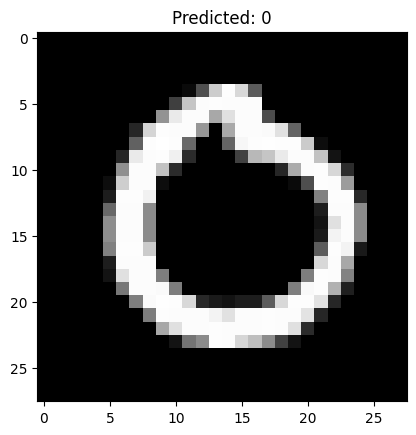

In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Flatten the images from 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))  # Add more layers if needed
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Make predictions
predictions = model.predict(x_test)

# Optionally visualize predictions on a sample test image
import numpy as np
import matplotlib.pyplot as plt

# Choose a random image from test set
random_index = np.random.randint(0, x_test.shape[0])
plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[random_index])}")
plt.show()
